### Prospect Mapping 2

#### After meeting
- Establishment Aplicor ID will be useful to group the same schools
- Option and completed are the good indiators from the stage
- Maybe take averages rather than adding deciles to then be able to remove characteristics without a value
- PP bracket is how much government help they get in percentage
New notes
- Middle range of schools


In [1]:
# importing the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import close as clc
import seaborn as sns
# Importing the data from the .xlsx as a data frame using the pandas module
df = pd.read_csv("PGL_data.csv", low_memory = False)

#Removing the unecessary columns by name
df.drop(columns = {'Column21', 'Column22', 'Column23', 'Column24'}, inplace=True)
col = df.columns.tolist()

print('index  |                     column name     |    number of entries')
print('-------------------------------------------------------------------------------------')
for heading in col:
    print("%3.0f    |    %30s   |    %8.0f" % (col.index(heading), heading, len(df[heading].loc[df[heading].notna()])))
print('-------------------------------------------------------------------------------------')

index  |                     column name     |    number of entries
-------------------------------------------------------------------------------------
  0    |                      Account Name   |      187864
  1    |          Establishment Aplicor ID   |      187858
  2    |                Contact Aplicor ID   |      187864
  3    |                             Stage   |      187514
  4    |                Opportunity Source   |       87182
  5    |                       Loss Reason   |       51912
  6    |                           Product   |      183022
  7    |                            Course   |       59973
  8    |                 Booking Reference   |      187864
  9    |             Centre(s) of Interest   |       63827
 10    |                Accommodation Type   |       21327
 11    |                      Arrival Date   |      165044
 12    |                      Booking Date   |      139149
 13    |                         Age Range   |       59343
 14    |            

The schools need to be grouped, lets see how many there are.

In [2]:
df[col[37]].head(50)
plt.close()

In [3]:
print('Establishment Aplicor ID \t      | amount of entries')
print('----------------------------------------------------------')
df[col[1]].loc[df[col[1]].notna()].value_counts().head(5)

Establishment Aplicor ID 	      | amount of entries
----------------------------------------------------------


D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B    591
90019712-630C-46A5-97DA-3700973C36D4    139
5418D529-39E2-451F-8FC0-12ED43A769D0    114
750A0A98-2D53-451B-B4C0-D027AB49A048    106
818D43DF-714A-4259-B90D-FA57279CDE5E    103
Name: Establishment Aplicor ID, dtype: int64

***
So there are 20,608 schools on this record. By looking at the school that has 591 entries, the characteristics can be studied and see what they have in common with the other schools that have repeatedly used PGL.

In [4]:
df.loc[df[col[1]] == 'D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B'].head(2)
# df.loc[df[col[0]].str.contains('Hereford Cathedral')]

,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
1221,PGL Hen Party (IT TEST RECORD) - nicktest2,D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B,476E62B6-4BAE-4DEA-BE7D-6918F6D8A412,New,Brochure request,NaN,NaN,NaN,mm test,NaN,...,Existing,NaN,Do Not Apply,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2069,PGL Hen Party (IT TEST RECORD) - nicktest2,D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B,096de55f-840f-9dbd-cfab-652c03e85dc7,Closed - Not Quoted,Email,Reason not Listed,AUK (Adventure UK),NaN,AU21,NaN,...,Existing,NaN,Do Not Apply,NaN,NaN,NaN,NaN,NaN,2.0,2.0


***
Looks like this Establishment Aplicor ID has been created for Hen parties or an 'IT TEST RECORD'. Changed it to just print the first record for less clutter.

In [5]:
df.loc[df[col[1]] == '90019712-630C-46A5-97DA-3700973C36D4'].head(2)

,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
27249,Backwell School (Lighthouse Schools Partnership),90019712-630C-46A5-97DA-3700973C36D4,0EFAB743-3461-4EB9-A2DE-3B96C90E5C3E,Completed,NaN,NaN,OSA (Overseas Adventure),NaN,AF00000148,NaN,...,New,Spring,301-3000,21-50,0%-10%,1001-1500,45 - 50 Miles,Secondary,7.0,9.0
27250,Backwell School (Lighthouse Schools Partnership),90019712-630C-46A5-97DA-3700973C36D4,0DC0C86E-1262-4293-9D6E-A36A765093CB,Completed,NaN,NaN,OSA (Overseas Adventure),NaN,AF00000216,NaN,...,Existing,Summer,301-3000,21-50,0%-10%,1001-1500,45 - 50 Miles,Secondary,7.0,9.0


The next highest establishment is a school so I am gathering that the rest are real schools as well.

The line below takes the top 500 and lowest 500 schools based on how many times they have used PGL and stores them into top_establishments and lower_establishments respectively to compare how different columns compare between the two grroups.

In [6]:
top_establishments_interaction = df[col[1]].loc[df[col[1]].notna()].value_counts().head(50)
top_establishments = df[col[1]].loc[df[col[1]].notna()].value_counts().head(500).index.tolist()
lower_establishments = df[col[1]].loc[df[col[1]].notna()].value_counts().tail(500).index.tolist()

# removing the hen party IT one
top_establishments.remove('D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B')

Thinking about how to plot each cateogory, the first attempt just plotted all the values for each time the schools used PGL. For a band like the school size, this just skewed the bars as if a school used PGL 100 times then a bar would be representing 1 school 100 times. The lowest schools have probably only used them once so only 1 entry would be used. Because of this, the below function takes all the entries for each school and takes the mode of them. This seems the be the fairest option at the moment.

The function below takes a column of choice and an order of the options if applicable (if not enter 0 for this). It will then produce a barchart comparing the best and worst schools.

In [7]:
def mode_bar_bands(column,order):
    upper_schools = df.loc[df[col[1]].isin(top_establishments)]
    upper_mode= upper_schools.groupby([col[1]])[column].agg(pd.Series.mode).explode()
    upper_mode = upper_mode[(upper_mode.str.len() > 0)]
    
    lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
    lower_mode = lower_schools.groupby([col[1]])[column].agg(pd.Series.mode).explode()
    lower_mode = lower_mode[lower_mode.str.len() > 0]
    # plt.style.use('seaborn-pastel')
    sns.set_theme()
    d = pd.DataFrame({'upper_mode' : upper_mode.value_counts(normalize=True).mul(100), 'lower_mode' : lower_mode.value_counts(normalize=True).mul(100)})
    if order != 0:
        d.sort_index().loc[order].plot.bar()
    else:
        d.sort_index().plot.bar()
    plt.legend()
    plt.title('Chart to show the mode of each school for ' + column)
    plt.xlabel(column)
    plt.ylabel('Percentage of of schools [%]')
    
    print("Number of top schools used that have values = ", len(upper_mode))
    print("Number of bottom schools used that have values = ", len(lower_mode))
    return d
# df[col[37]].replace(np.nan,0,inplace=True)
# df[col[37]] = df[col[37]].astype(int)


In [8]:
# upper_schools = df.loc[df[col[1]].isin(top_establishments)]
# upper_schools[col[37]].
# upper_mode= upper_schools.groupby([col[1]])[col[37]].agg('min').explode()

# upper_mode

In [9]:
order = ['0-100','101-250','251-500','501-1000','1001-1500','1501-2001']
school_size_banding = mode_bar_bands(col[44],order)
plt.close()

Number of top schools used that have values =  125
Number of bottom schools used that have values =  128


Looking at the influence of school size banding, it seems like the best schools are in the 501-1000 band and the worst seem to be in the 101-250. Interesting how its not the biggest and the smallest but this could also be because of the average size of schools which will play a factor. This meeans that PGL could still target the even larger schools fromm 500 upwards.

In [10]:
pp_banding = mode_bar_bands(col[43], 0)
order_pp = ['0%-10%','11%-22%','23%-30%','31%-40%','41%-50%','61%-70%','71%-80%']
plt.close()

Number of top schools used that have values =  124
Number of bottom schools used that have values =  125


Above shows that the schools that have used PGL the most tend to be in the 11-22% range for government funding. This is also shown by the worst schools as well though and the general trend seems to be the same. This may suggest that this column doesnt have much of an influnece.

In [11]:
order_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly = mode_bar_bands(col[31],order_months)
plt.close()

Number of top schools used that have values =  530
Number of bottom schools used that have values =  261


In [12]:
mode_bar_bands(col[6],0)
plt.close()

Number of top schools used that have values =  506
Number of bottom schools used that have values =  482


In [13]:
mode_bar_bands(col[45],0)
plt.close()

Number of top schools used that have values =  125
Number of bottom schools used that have values =  128


Number of top schools used that have values =  125
Number of bottom schools used that have values =  128


,upper_mode,lower_mode
00 - 05 Miles,0.8,0.78125
05 - 10 Miles,4.8,0.78125
10 - 15 Miles,8.0,3.12500
15 - 20 Miles,8.8,3.90625
20 - 25 Miles,15.2,7.81250
25 - 30 Miles,8.0,10.15625
30 - 35 Miles,22.4,15.62500
35 - 40 Miles,11.2,17.18750
40 - 45 Miles,8.8,19.53125
45 - 50 Miles,8.8,9.37500


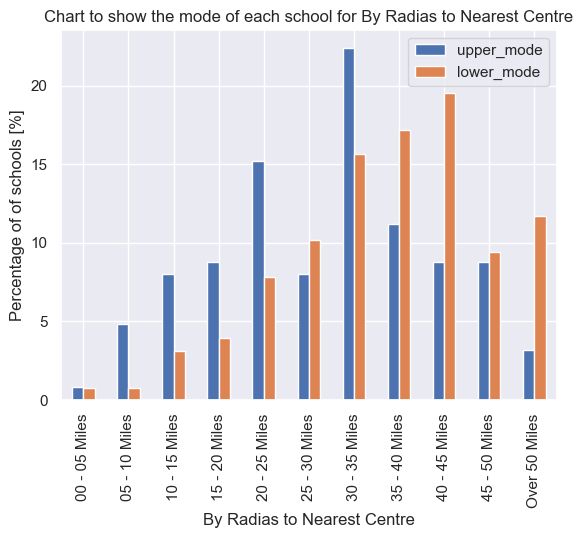

In [14]:
order_radius = ['00 - 05 Miles','05 - 10 Miles','10 - 15 Miles','15 - 20 Miles','20 - 25 Miles','25 - 30 Miles','30 - 35 Miles','35 - 40 Miles','40 - 45 Miles','45 - 50 Miles','Over 50 Miles']
mode_bar_bands(col[45],0)
# plt.close()

***
#### Relating the bar plots to a decile value

Relating these plots to a decile, starting with the PP bracket (amount of funding a school receives from the government). Maybe the school should simply be based on the percentage of top schools that have each banding?

Looking at the values below, 40.3% of top schools have 11-22% do we use the 0.404 as a decile value for schools in this bracket?


In [15]:
# print('Bracket | Percentage [%]')
pp_banding['upper_mode'].sort_values(ascending=False).fillna(0)
pp_banding.loc['71%-80%'] = [0,0]
pp_banding.loc['81%-100%'] = [0,0]#len(df.index)


Moving onto school size by pupil banding, the same applies. Looking below, the 501-1000 band has the greatest amount of top schools in it. 

The interesting thing about this characteristic is that a school may be more likely to use PGL if they were in the highest bracket, it just doesn't show becasue there arent that many schools in that band. A way of seeing this is to just plot the schools that are in 1501-2001 band and see how many times they have all used PGL.

In [16]:
print('Bracket   | Percentage [%]')
school_size_banding['upper_mode'].sort_values(ascending=False)

Bracket   | Percentage [%]


501-1000     37.6
251-500      28.8
1001-1500    19.2
101-250      10.4
1501-2001     4.0
0-100         NaN
Name: upper_mode, dtype: float64

In [17]:
print('Bracket   | Percentage [%]')
monthly['upper_mode'].sort_values(ascending=False)

Bracket   | Percentage [%]


Jun    19.056604
May    17.924528
Jul    16.981132
Mar    13.018868
Feb    11.509434
Apr     6.981132
Sep     5.849057
Oct     4.528302
Aug     2.264151
Nov     1.886792
Dec          NaN
Jan          NaN
Name: upper_mode, dtype: float64

***

Now that function only works for the columns with bands. In order to use the columns that have a non-discretised value, the best solution will be to take the average of the numbers. This means that the results cannot be plotted as barcharts anymore so a scatter graph will be used to see if it represents the data well.

This may not be that useful. After plotting it, the lower schools are all just going to have used PGL once which is why it is just a vertical line. The top schools cluster is quite hard to read.

Maybe plotting gross revenue against something like the month they booked?

In [18]:
column = col[19]
upper_schools = df.loc[df[col[1]].isin(top_establishments)]
upper_school_interaction = upper_schools.value_counts(col[1])
upper_mode = upper_schools.groupby([col[1]])[column].agg(pd.Series.mean)
    
lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
lower_mode = lower_schools.groupby([col[1]])[column].agg(pd.Series.mean)
plt.figure(figsize=(20,5))
plt.plot(upper_school_interaction, upper_mode)
plt.close()

707
2758
2240
793
250
33

['0', '1-5', '6-10', '11-20', '21-50', '51=<']
[0, 9, 6, 9, 8, 1]


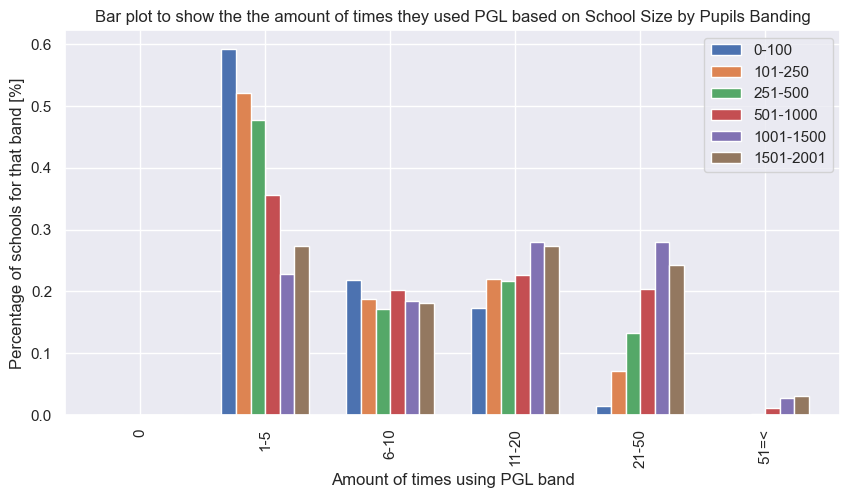

In [19]:
def number_times_used(column,order):


    width = 0.01

    # Calculate the horizontal position of each bar
    bands_names = ['0','1-5','6-10','11-20','21-50','51=<']
    frame = pd.DataFrame(index=bands_names)

    for name in order:
        large_schools = df[col[1]].loc[df[column] == name].value_counts(ascending=True).sort_values()
        bands = [0,0,0,0,0,0]
        length = len(df[col[1]].loc[df[column] == name].value_counts(ascending=True))
        print(length)

        for i in large_schools:  
            if i == 0:
                bands[0]+=1
            elif i > 0 and i < 6 :
                bands[1]+=1
            elif i > 5 and i < 11:
                bands[2]+=1
            elif i > 10 and i < 21:
                bands[3]+=1     
            elif i > 20 and i < 51:
                bands[4]+=1
            elif i > 50:
                bands[5]+=1
            else:
            # print(i)
                bands[6]+=1
        frame[name] = bands
        # print(frame[name])
        frame[name] = frame[name].div(length)
        # print(frame[name])
        # print(large_schools.head(50))
    print()   
    frame.plot.bar(rot=90,figsize = (10 ,5), width=0.7)
    plt.title('Bar plot to show the the amount of times they used PGL based on '+column)
    plt.xlabel('Amount of times using PGL band')
    plt.ylabel('Percentage of schools for that band [%]')
    plt.legend()
    print(bands_names)
    print(bands)
    # plt.close()


order1 = ['0-100','101-250','251-500','501-1000','1001-1500','1501-2001']
number_times_used(col[44],order1)

1919
2341
878
771
407
65
8

['0', '1-5', '6-10', '11-20', '21-50', '51=<']
[0, 2, 2, 3, 1, 0]


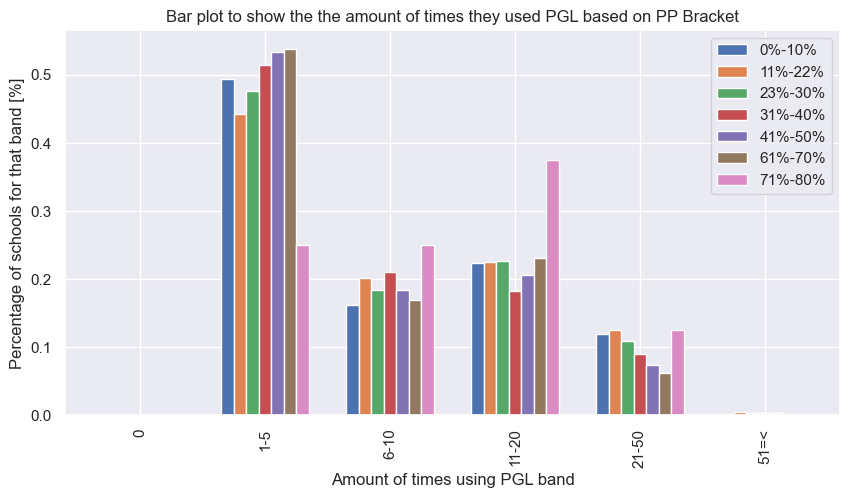

In [20]:
number_times_used(col[43],order_pp)

96
269
346
460
612
745
975
1147
835
624
673

['0', '1-5', '6-10', '11-20', '21-50', '51=<']
[0, 379, 102, 142, 50, 0]


(0.0, 0.01)

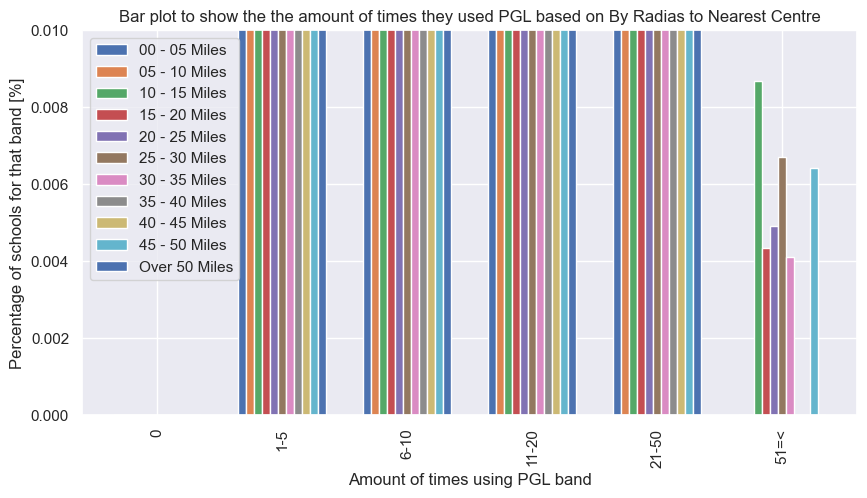

In [21]:
number_times_used(col[45],order_radius)
plt.ylim([0,0.01])

***
#### Schools that only used PGL once
From the last meeting we had, it was discussed that it may be useful to know how many schools have only used PGL once.

In [22]:
times1 = sum(df[col[1]].loc[df[col[1]].notna()].value_counts() == 1)

print(times1,' schools have only used PGL once')

3556  schools have only used PGL once


This means that in the lower_schools band all schools have only used them once, would be good to then compare this to what the outcome or 'stage' was for them.

Closed - Not booked       1063
Closed - Not Quoted        956
Expired                    493
Closed - Booked            303
New                        166
Completed                  113
Quote                      109
Failed Quote                97
CATMN / Needs Analysis      89
Option                      50
Rejected                    37
Closed - Expired            14
Cancelled                   13
Price Quote                  3
Requested                    2
Pending                      1
Name: Stage, dtype: int64

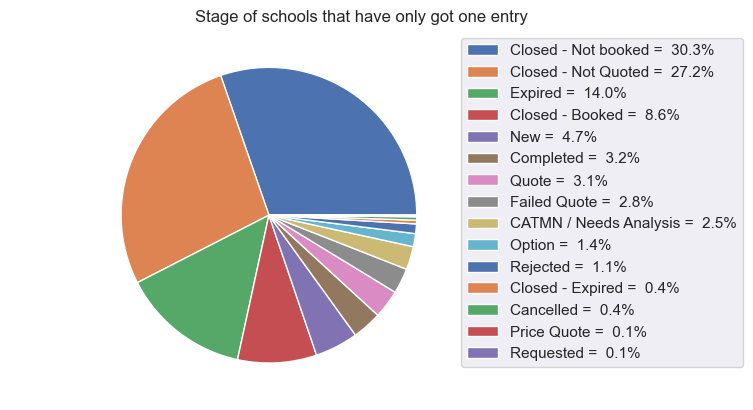

In [23]:
one_time = df[col[1]].loc[df[col[1]].notna()].value_counts()
one_time_use = one_time.loc[one_time == True]
cats = ['Closed - Not booked','Closed - Not Quoted', 'Expired', 'Closed - Booked','New','Completed','Quote','Failed Quote','CATMN / Needs Analysis','Option','Rejected','Closed - Expired','Cancelled','Price Quote','Requested']

one_time_use = one_time_use.index
# stages_for_one = df[col[3]].loc[df[col[1]].str.contains('|'.join(one_time_use))]
one_schools = df[col[3]].loc[df[col[1]].isin(one_time_use)].value_counts()
one_schools
tot = np.sum(one_schools)
perc = one_schools/tot*100
labels = ['%s =  %1.1f%%' % (l, s) for l, s in zip(cats, perc)]
plt.pie(one_schools)
plt.legend(labels,bbox_to_anchor=(1,1))
plt.title('                                        Stage of schools that have only got one entry')
one_schools

So looking at the schools that only have 1 entry, it's clear to see that 30% of them are under the 'Not booked' category of stages. This should have an effect on the schools that are used in the data a

## Deciles

Now that we have enstablished 




In [24]:
decile_frame = pd.DataFrame()

def decile_it(banding, column):
    def replace_values_with_matching_index(series1, series2):
        for index, value in series1.items():
            if value in series2.index:
                series1[index] = series2[value]
            else:
                series1[index] = 0
        return series1

    deciles = banding['upper_mode'].sort_values(ascending=False).mul(0.01).fillna(0)
    school_list = df[col[1]].loc[df[col[1]].notna()].value_counts()
    d = df.groupby([col[1]])[column].agg(pd.Series.mode).explode()
    replace_values_with_matching_index(d,deciles)
    decile_frame[column] = d
    return decile_frame


decile_it(monthly,col[31])
decile_it(pp_banding,col[43])
decile_it(school_size_banding,col[44])

,Arrival Month,PP Bracket,School Size by Pupils Banding
Establishment Aplicor ID,,,
0002106F-396A-48C1-8F5F-0BA61EF6B496,0.069811,0.040323,0.288
00044B59-586D-4E05-B438-57C5BD52E948,0.190566,0,0
00053F9E-9566-477B-9AA5-8F5D1770BB87,0.190566,0.403226,0.288
0007B6B6-2CA0-4352-A3AC-F0BE26A4C69B,0.045283,0,0
0008E7C9-4CAC-4A30-B2D3-493105602E42,0.045283,0.217742,0.0
...,...,...,...
feb3dcbd-4566-4e1c-8a3c-89917a5d162c,0.179245,0,0
fef4e048-943f-4e1c-91a6-a8f6ed4779d5,0.190566,0,0
ff2980cf-b534-45ef-b96c-fc60363d69e2,0.179245,0,0


In [44]:
def calculate_average_per_row(dataframe):
    dataframe = dataframe.replace(0,np.nan)
    dataframe = dataframe.astype(float)
    average_per_row = dataframe.mean(axis=1, skipna=True)
    # numeric_columns = dataframe.select_dtypes(include=[float, bool,'number','string'])
     # Convert values to float
    # average_per_row = dataframe.mean()
    dataframe['Average'] = average_per_row
    return dataframe

dm = calculate_average_per_row(decile_frame)

dm.head()



,Arrival Month,PP Bracket,School Size by Pupils Banding,Average
Establishment Aplicor ID,,,,
0002106F-396A-48C1-8F5F-0BA61EF6B496,0.069811,0.040323,0.288,0.132711
00044B59-586D-4E05-B438-57C5BD52E948,0.190566,NaN,NaN,0.190566
00053F9E-9566-477B-9AA5-8F5D1770BB87,0.190566,0.403226,0.288,0.293931
0007B6B6-2CA0-4352-A3AC-F0BE26A4C69B,0.045283,NaN,NaN,0.045283
0008E7C9-4CAC-4A30-B2D3-493105602E42,0.045283,0.217742,NaN,0.131512


In [43]:
# dm['Average'].loc[dm['Average'] >=0.4]
dm['Average'].sort_values(ascending=False)
schools = dm['Average'].sort_values(ascending=False).head(5).index.tolist()

for ID in schools:
    display(df.loc[df[col[1]] == ID].head(1))

,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
22365,Grateley Primary School,140C2ADB-3822-4D5A-B908-5B0FA81F2950,94553c3a-4be5-4091-a324-ae7ea8431504,Closed - Not Quoted,Cancellation Follow-up,Reason not Listed,AUK (Adventure UK),Multi Activity,AU21/OSM/MA/JUN,Osmington Bay,...,Existing,NaN,Do Not Apply,NaN,11%-22%,0-100,20 - 25 Miles,Primary,1.0,2.0


,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
15832,Byley Primary School,4EB7E83E-84C2-4E0B-A601-D473CCB26CAE,963AFBAA-D5B5-43AA-81EF-44CB2083C46A,Closed - Not booked,Campaign follow-up,Biennial booker,AUK (Adventure UK),NaN,AU20/spring offer,NaN,...,New,NaN,Do Not Apply,NaN,11%-22%,0-100,30 - 35 Miles,Primary,NaN,NaN


,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
10526,Dodleston Ce Primary School,0E925F92-F3EB-4268-850B-A3A37FD11644,66F2BDBB-5F45-4861-950D-A6CCEC4DBDE1,Closed - Not Quoted,Non rebooker,No Response from client / Insufficient Informa...,AUK (Adventure UK),Multi Activity,AU21/BP/MA/MAR,Boreatton Park Lodges,...,Existing,NaN,Do Not Apply,NaN,11%-22%,0-100,20 - 25 Miles,Primary,1.0,0.0


,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
10526,Dodleston Ce Primary School,0E925F92-F3EB-4268-850B-A3A37FD11644,66F2BDBB-5F45-4861-950D-A6CCEC4DBDE1,Closed - Not Quoted,Non rebooker,No Response from client / Insufficient Informa...,AUK (Adventure UK),Multi Activity,AU21/BP/MA/MAR,Boreatton Park Lodges,...,Existing,NaN,Do Not Apply,NaN,11%-22%,0-100,20 - 25 Miles,Primary,1.0,0.0


,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
10526,Dodleston Ce Primary School,0E925F92-F3EB-4268-850B-A3A37FD11644,66F2BDBB-5F45-4861-950D-A6CCEC4DBDE1,Closed - Not Quoted,Non rebooker,No Response from client / Insufficient Informa...,AUK (Adventure UK),Multi Activity,AU21/BP/MA/MAR,Boreatton Park Lodges,...,Existing,NaN,Do Not Apply,NaN,11%-22%,0-100,20 - 25 Miles,Primary,1.0,0.0


Number of top schools used that have values =  499
Number of bottom schools used that have values =  500


,upper_mode,lower_mode
0,0.400802,65.6
2012,0.200401,NaN
2013,1.603206,NaN
2014,5.611222,NaN
2015,17.835671,NaN
2016,37.274549,6.4
2017,26.452906,18.6
2018,8.817635,9.2
2019,1.603206,NaN
2020,0.200401,NaN


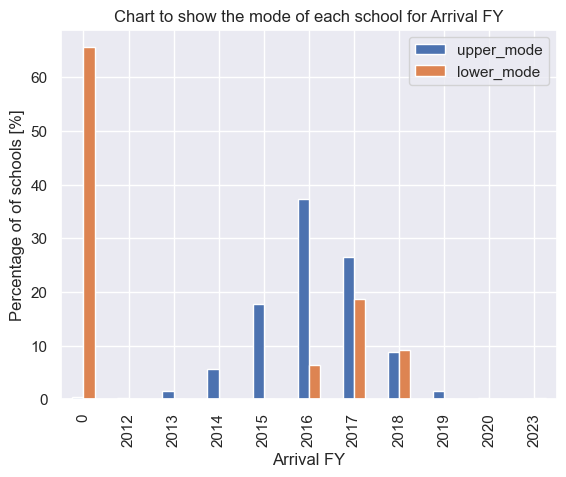

In [26]:
def mean_bar_bands(column,order):
    upper_schools = df.loc[df[col[1]].isin(top_establishments)]
    upper_mode= upper_schools.groupby([col[1]])[column].agg(pd.Series.mean).explode()
    upper_mode = upper_mode.fillna(0).astype(int)
    
    lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
    lower_mode = lower_schools.groupby([col[1]])[column].agg(pd.Series.mean).explode()
    lower_mode = lower_mode.fillna(0).astype(int)

    sns.set_theme()
    d = pd.DataFrame({'upper_mode' : upper_mode.value_counts(normalize=True).mul(100), 'lower_mode' : lower_mode.value_counts(normalize=True).mul(100)})
    if order != 0:
        d.sort_index().loc[order].plot.bar()
    else:
        d.sort_index().plot.bar()
    plt.legend()
    plt.title('Chart to show the mode of each school for ' + column)
    plt.xlabel(column)
    plt.ylabel('Percentage of of schools [%]')
    
    print("Number of top schools used that have values = ", len(upper_mode))
    print("Number of bottom schools used that have values = ", len(lower_mode))
    return d
# df[col[37]].replace(np.nan,0,inplace=True)

mean_bar_bands(col[30],0)

In [47]:
df[col[22]].sort_values().head(50)

166513   -20245.00
171495    -7980.00
62150     -7210.50
61099     -5842.00
60991     -5681.00
143802    -5599.12
53365     -5354.40
146537    -5120.84
164900    -3700.00
54262     -3092.35
56367     -3049.80
168668    -3027.35
142301    -2688.00
58441     -2593.25
57500     -2455.50
152788    -2310.00
55239     -2070.00
140920    -2064.40
161106    -2012.18
160866    -2000.00
157516    -1950.00
56438     -1889.45
149067    -1755.00
58643     -1416.80
56838     -1395.15
140913    -1377.14
68666     -1300.00
62293     -1288.00
140713    -1275.60
59902     -1265.00
161296    -1250.00
58072     -1160.35
53982     -1138.94
150333    -1134.00
50345      -934.32
147869     -855.00
60419      -833.75
60212      -805.00
57930      -803.85
164950     -800.00
62430      -782.00
139000     -760.00
159739     -742.30
58193      -730.25
147095     -726.00
147355     -720.00
143916     -720.00
154022     -685.71
126983     -680.00
58371      -678.50
Name: Gross Revenue, dtype: float64

Number of top schools used that have values =  499
Number of bottom schools used that have values =  500


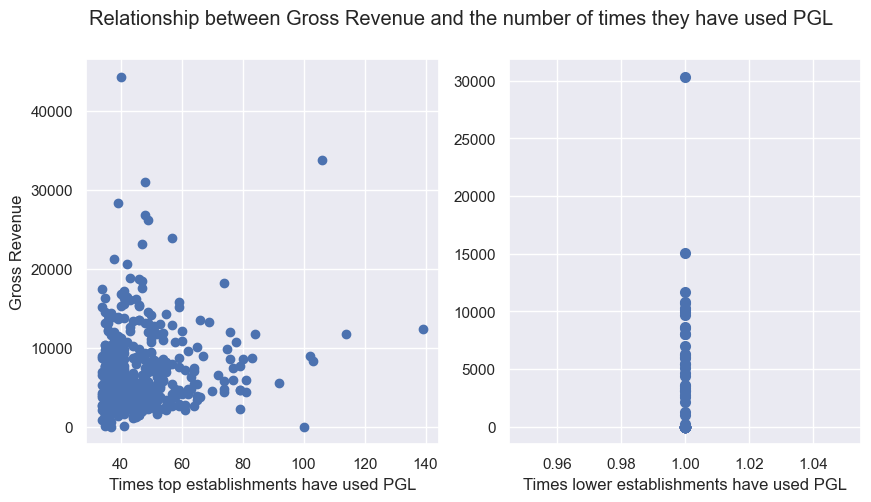

In [27]:
def average_bar(column,order):
    upper_schools = df.loc[df[col[1]].isin(top_establishments)]
    upper_school_interaction = upper_schools.value_counts(col[1])
    upper_mode = upper_schools.groupby([col[1]])[column].agg(pd.Series.mean)
    upper_schools = pd.DataFrame({'interaction' : upper_school_interaction, 'mean' : upper_mode})
    
    lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
    lower_school_interaction = lower_schools.value_counts(col[1])
    lower_mode = lower_schools.groupby([col[1]])[column].agg(pd.Series.mean)
    lower_schools = pd.DataFrame({'interaction' : lower_school_interaction, 'mean' : lower_mode})
    lower_schools = lower_schools.sort_values('mean')
    
    plt.figure(figsize=(10,5))
    # plt.style.use('seaborn')
    sns.set_theme()
    plt.subplot(1,2,1)
    plt.scatter(upper_schools['interaction'], upper_schools['mean'])
    plt.xlabel('Times top establishments have used PGL')
    plt.ylabel(column)
    plt.suptitle('Relationship between '+column+' and the number of times they have used PGL')

    plt.subplot(1,2,2)
    plt.scatter(lower_school_interaction, lower_mode, linewidths=2)
    # plt.legend()
    plt.xlabel('Times lower establishments have used PGL')
    # plt.ylabel('Percentage of of schools [%]')
    
    print("Number of top schools used that have values = ", len(upper_mode))
    print("Number of bottom schools used that have values = ", len(lower_mode))

average_bar(col[22],0)